
### **Importing Libraries**

In [1]:
import os
import numpy as np
import pandas as pd
import re
import tensorflow as tf
from sklearn.impute import SimpleImputer
from bs4 import BeautifulSoup
import re,string,unicodedata
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

## Loding Dataset

In [2]:
data=pd.read_csv('author.csv',nrows=10000)

In [3]:
data.head(10)

,Gender,Age Group,Content
0,female,30s,By deciding on a tidy organizational device yo...
1,female,20s,Each year we all make the same resolutions: to...
2,male,30s,For indoor utilizes these lights come in reduc...
3,female,30s,1. Look your best.<br />;If you're a Kurt Coba...
4,female,20s,For years tax debt resolution was about mislea...
5,female,30s,"<img class=""smiley"" src=""http://www.pan.net/sm..."
6,female,20s,"Its better a living Dog, than a dead Lion........"
7,female,30s,"<a href=""http://en.pan.netcom/go/out/url=-aHR0..."
8,female,20s,"For centuries, society has been slowly driftin..."
9,female,30s,Any homeowner that is currently dealing with a...


### Drop rows with missing Values in content

In [4]:
missing_values = data['Content'].isnull().sum()
missing_values

0

In [5]:
data = data.dropna(subset=['Content'])

### Null values in the dataset

In [6]:
null_values = data.isnull().sum()

In [7]:
print('There are {} missing values for {} and {} missing values for {} {} {}.'.format(null_values[0],null_values.index[0],null_values[1],null_values.index[1],null_values[2],null_values.index[2]))

There are 0 missing values for Gender and 0 missing values for Age Group 0 Content.


### Duplicate Rows

In [8]:
num_duplicates = data.duplicated().sum()
print('There are {} duplicatetext present in the dataset'.format(num_duplicates))

There are 16 duplicatetext present in the dataset


In [9]:
data.drop_duplicates(inplace = True)

### Remaining Rows

In [10]:
print('The dataset contains {} rows and {} columns after removing duplicates'.format(data.shape[0],data.shape[1]))

The dataset contains 9984 rows and 3 columns after removing duplicates


In [11]:
data.head(10)

,Gender,Age Group,Content
0,female,30s,By deciding on a tidy organizational device yo...
1,female,20s,Each year we all make the same resolutions: to...
2,male,30s,For indoor utilizes these lights come in reduc...
3,female,30s,1. Look your best.<br />;If you're a Kurt Coba...
4,female,20s,For years tax debt resolution was about mislea...
5,female,30s,"<img class=""smiley"" src=""http://www.pan.net/sm..."
6,female,20s,"Its better a living Dog, than a dead Lion........"
7,female,30s,"<a href=""http://en.pan.netcom/go/out/url=-aHR0..."
8,female,20s,"For centuries, society has been slowly driftin..."
9,female,30s,Any homeowner that is currently dealing with a...


## Count of Ages and Gender

In [12]:
age_counts = data['Age Group'].value_counts()
gender_counts = data['Gender'].value_counts()
print("Age Counts:")
print(age_counts)
print("\nGender Counts:")
print(gender_counts)

Age Counts:
30s    5708
20s    3556
10s     720
Name: Age Group, dtype: int64

Gender Counts:
male      5049
female    4935
Name: Gender, dtype: int64


## Exploratory Data Analysis


In [13]:
import matplotlib.pyplot as plt

### DATA REPRESENTATION -1

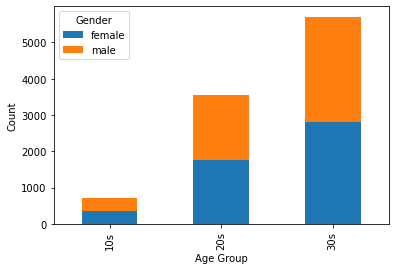

In [14]:
age_column = 'Age Group'
gender_column = 'Gender'
pivot_table = data.groupby([age_column, gender_column]).size().unstack()
fig, ax = plt.subplots()
pivot_table.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.legend(title='Gender')
plt.show()


In [15]:
from wordcloud import WordCloud

## PreProcessing

In [16]:
def preprocess_text(text):
    text = re.sub(r'<\s*br\s*/?\s*>', '', text) # html tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d', '', text)  # Remove numbers
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    return text

In [17]:
print(data['Content'].apply(type).value_counts())

<class 'str'>    9984
Name: Content, dtype: int64


In [18]:
data=data[pd.notna(data['Content'])]

In [19]:
data['Processed Text'] = data['Content'].apply(preprocess_text)

In [20]:
data.head(10)

,Gender,Age Group,Content,Processed Text
0,female,30s,By deciding on a tidy organizational device yo...,by deciding on a tidy organizational device yo...
1,female,20s,Each year we all make the same resolutions: to...,each year we all make the same resolutions to ...
2,male,30s,For indoor utilizes these lights come in reduc...,for indoor utilizes these lights come in reduc...
3,female,30s,1. Look your best.<br />;If you're a Kurt Coba...,look your bestif youre a kurt cobain or johnny...
4,female,20s,For years tax debt resolution was about mislea...,for years tax debt resolution was about mislea...
5,female,30s,"<img class=""smiley"" src=""http://www.pan.net/sm...",img classsmiley srchttpwwwpannetsmiliessmilegi...
6,female,20s,"Its better a living Dog, than a dead Lion........",its better a living dog than a dead lion
7,female,30s,"<a href=""http://en.pan.netcom/go/out/url=-aHR0...",a hrefhttpenpannetcomgoouturlahrcdovlddytzwxyb...
8,female,20s,"For centuries, society has been slowly driftin...",for centuries society has been slowly drifting...
9,female,30s,Any homeowner that is currently dealing with a...,any homeowner that is currently dealing with a...


### DATA REPRESENTATION -2

In [21]:
print(data.columns)

Index(['Gender', 'Age Group', 'Content', 'Processed Text'], dtype='object')


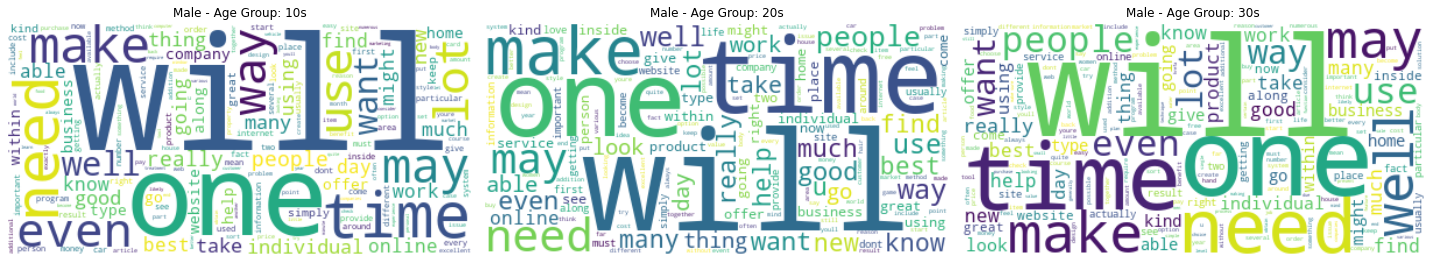

In [22]:
male_data_10s = data[(data["Gender"] == "male") & (data["Age Group"] == "10s")]
male_data_20s = data[(data["Gender"] == "male") & (data["Age Group"] == "20s")]
male_data_30s = data[(data["Gender"] == "male") & (data["Age Group"] == "30s")]

# Join text data for each age group
male_data_10s_text = ' '.join(male_data_10s['Processed Text'])
male_data_20s_text = ' '.join(male_data_20s['Processed Text'])
male_data_30s_text = ' '.join(male_data_30s['Processed Text'])

# Create word clouds for each age group
wordcloud_10s = WordCloud(background_color='white').generate(male_data_10s_text)
wordcloud_20s = WordCloud(background_color='white').generate(male_data_20s_text)
wordcloud_30s = WordCloud(background_color='white').generate(male_data_30s_text)

# Plotting the word clouds for each age group
plt.figure(figsize=(20, 6))

plt.subplot(131)
plt.imshow(wordcloud_10s, interpolation='bilinear')
plt.axis('off')
plt.title("Male - Age Group: 10s")

plt.subplot(132)
plt.imshow(wordcloud_20s, interpolation='bilinear')
plt.axis('off')
plt.title("Male - Age Group: 20s")

plt.subplot(133)
plt.imshow(wordcloud_30s, interpolation='bilinear')
plt.axis('off')
plt.title("Male - Age Group: 30s")

plt.tight_layout()
plt.show()


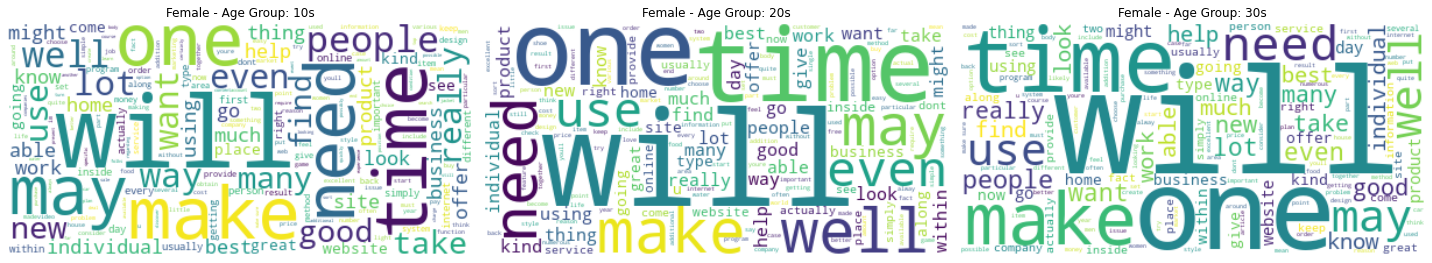

In [23]:
female_data_10s = data[(data["Gender"] == "female") & (data["Age Group"] == "10s")]
female_data_20s = data[(data["Gender"] == "female") & (data["Age Group"] == "20s")]
female_data_30s = data[(data["Gender"] == "female") & (data["Age Group"] == "30s")]

# Join text data for each age group
female_data_10s_text = ' '.join(female_data_10s['Processed Text'])
female_data_20s_text = ' '.join(female_data_20s['Processed Text'])
female_data_30s_text = ' '.join(female_data_30s['Processed Text'])

# Create word clouds for each age group
wordcloud_10sfe = WordCloud(background_color='white').generate(female_data_10s_text)
wordcloud_20sfe = WordCloud(background_color='white').generate(female_data_20s_text)
wordcloud_30sfe = WordCloud(background_color='white').generate(female_data_30s_text)

# Plotting the word clouds for each age group
plt.figure(figsize=(20, 6))

plt.subplot(131)
plt.imshow(wordcloud_10sfe, interpolation='bilinear')
plt.axis('off')
plt.title("Female - Age Group: 10s")

plt.subplot(132)
plt.imshow(wordcloud_20sfe, interpolation='bilinear')
plt.axis('off')
plt.title("Female - Age Group: 20s")

plt.subplot(133)
plt.imshow(wordcloud_30sfe, interpolation='bilinear')
plt.axis('off')
plt.title("Female - Age Group: 30s")

plt.tight_layout()
plt.show()


## String Indexer

In [24]:
column_to_index = 'Age Group'
label_encoder = LabelEncoder()
data[column_to_index + '_indexed'] = label_encoder.fit_transform(data[column_to_index])
data.head(10)

,Gender,Age Group,Content,Processed Text,Age Group_indexed
0,female,30s,By deciding on a tidy organizational device yo...,by deciding on a tidy organizational device yo...,2
1,female,20s,Each year we all make the same resolutions: to...,each year we all make the same resolutions to ...,1
2,male,30s,For indoor utilizes these lights come in reduc...,for indoor utilizes these lights come in reduc...,2
3,female,30s,1. Look your best.<br />;If you're a Kurt Coba...,look your bestif youre a kurt cobain or johnny...,2
4,female,20s,For years tax debt resolution was about mislea...,for years tax debt resolution was about mislea...,1
5,female,30s,"<img class=""smiley"" src=""http://www.pan.net/sm...",img classsmiley srchttpwwwpannetsmiliessmilegi...,2
6,female,20s,"Its better a living Dog, than a dead Lion........",its better a living dog than a dead lion,1
7,female,30s,"<a href=""http://en.pan.netcom/go/out/url=-aHR0...",a hrefhttpenpannetcomgoouturlahrcdovlddytzwxyb...,2
8,female,20s,"For centuries, society has been slowly driftin...",for centuries society has been slowly drifting...,1
9,female,30s,Any homeowner that is currently dealing with a...,any homeowner that is currently dealing with a...,2


## Data Splitting

In [25]:
X = data['Processed Text']
y = data['Age Group_indexed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Feature Extraction
TF-IDF, Count Vectorizer

In [26]:
tfidf_vect = TfidfVectorizer()
Xtrain_tfidf = tfidf_vect.fit_transform(X_train)
Xtest_tfidf = tfidf_vect.transform(X_test)

count_vect = CountVectorizer()
Xtrain_count = count_vect.fit_transform(X_train)
Xtest_count = count_vect.transform(X_test)

## Models

In [27]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Logistic Rgression

In [28]:
logistic_regression_count = LogisticRegression(max_iter=100, random_state=42)
logistic_regression_count.fit(Xtrain_count, y_train)

predictions_lr = logistic_regression_count.predict(Xtest_count)
accuracy_lr= accuracy_score(y_test, predictions_lr)
precision_lr = precision_score(y_test, predictions_lr,average='weighted')
recall_lr = recall_score(y_test, predictions_lr,average='weighted')
f1_lr = f1_score(y_test, predictions_lr,average='weighted')
print("Logistic Regression Classifier  Accuracy :", "{:.2f}%".format(100*accuracy_lr))

Logistic Regression Classifier  Accuracy : 54.67%


C:\Users\B.Akhileswar Reddy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### KNN

In [29]:
knn_tfidf = KNeighborsClassifier()
knn_tfidf.fit(Xtrain_tfidf, y_train)

predictions_knn= knn_tfidf.predict(Xtest_tfidf)
accuracy_knn= accuracy_score(y_test, predictions_knn)
precision_knn = precision_score(y_test, predictions_knn,average='weighted')
recall_knn = recall_score(y_test, predictions_knn,average='weighted')
f1_knn = f1_score(y_test, predictions_knn,average='weighted')
print("K-Nearest Neighbors Classifier  Accuracy :", "{:.2f}%".format(100*accuracy_knn))

K-Nearest Neighbors Classifier  Accuracy : 57.94%


### Naive Bayes

In [30]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(Xtrain_count, y_train)

predictions_nb = naive_bayes_classifier.predict(Xtest_count)
accuracy_nb = accuracy_score(y_test, predictions_nb)
precision_nb = precision_score(y_test, predictions_nb,average='weighted')
recall_nb = recall_score(y_test, predictions_nb,average='weighted')
f1_nb = f1_score(y_test, predictions_nb,average='weighted')
print("Naive Bayes Accuracy :", "{:.2f}%".format(100*accuracy_nb))

Naive Bayes Accuracy : 61.72%


### SVM

In [31]:
linear_svc = LinearSVC(penalty='l2',loss = 'hinge')
linear_svc.fit(Xtrain_tfidf,y_train)

predictions_svm=linear_svc.predict(Xtest_tfidf)
accuracy_svm=accuracy_score(y_test,predictions_svm)

precision_svm = precision_score(y_test, predictions_svm, average='weighted')
recall_svm = recall_score(y_test, predictions_svm, average='weighted')
f1_svm= f1_score(y_test, predictions_svm, average='weighted')
print("Linear Support Vector Classifier Accuracy :", "{:.2f}%".format(100*accuracy_svm))

Linear Support Vector Classifier Accuracy : 62.02%


C:\Users\B.Akhileswar Reddy\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Random Forest

In [32]:
random_forest_tfidf = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_tfidf.fit(Xtrain_tfidf, y_train)

predictions_rf= random_forest_tfidf.predict(Xtest_tfidf)
accuracy_rf= accuracy_score(y_test, predictions_rf)
precision_rf = precision_score(y_test, predictions_rf,average='weighted')
recall_rf= recall_score(y_test, predictions_rf,average='weighted')
f1_rf= f1_score(y_test, predictions_rf,average='weighted')
print("Random Forest Classifier  Accuracy :", "{:.2f}%".format(100*accuracy_rf))

Random Forest Classifier  Accuracy : 62.38%


### Decision Tree Classifier

In [33]:
decision_tree_count = DecisionTreeClassifier()
decision_tree_count.fit(Xtrain_count, y_train)

predictions_dt = decision_tree_count.predict(Xtest_count)
accuracy_dt= accuracy_score(y_test, predictions_dt)
precision_dt = precision_score(y_test, predictions_dt,average='weighted')
recall_dt= recall_score(y_test, predictions_dt,average='weighted')
f1_dt= f1_score(y_test, predictions_dt,average='weighted')
print("KDecision Tree Classifier Accuracy :", "{:.2f}%".format(100*accuracy_dt))

KDecision Tree Classifier Accuracy : 53.37%


### Adaboost

In [34]:
base_classifier = DecisionTreeClassifier(max_depth=1)
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)
adaboost_classifier.fit(Xtrain_tfidf, y_train)

predictions_ada = adaboost_classifier.predict(Xtest_tfidf)
accuracy_ada = accuracy_score(y_test, predictions_ada)
precision_ada = precision_score(y_test, predictions_ada,average='weighted')
recall_ada = recall_score(y_test, predictions_ada,average='weighted')
f1_ada= f1_score(y_test, predictions_ada,average='weighted')
print("Adaboost Accuracy :", "{:.2f}%".format(100*accuracy_ada))

Adaboost Accuracy : 61.72%


## Comparisions

In [35]:
comparision_table = pd.DataFrame({
    'Model': ['Logistic Regression', 'K-neighbours','Naive Bayes','SVM','Random Forest','Decision Tree','Ada Boost' ],
    'Accuracy': [accuracy_lr,accuracy_knn,accuracy_nb ,accuracy_svm, accuracy_rf,accuracy_dt,accuracy_ada],
    'Precision':[precision_lr,precision_knn,precision_nb ,precision_svm,precision_rf,precision_dt,precision_ada],
        'Recall':[recall_lr,recall_knn,recall_nb ,recall_svm,recall_rf,recall_dt,recall_ada],
            'F1':[f1_lr,f1_knn,f1_nb ,f1_svm,f1_rf,f1_dt,f1_ada]
})

comparision_table

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.546729,0.533465,0.546729,0.539249
1,K-neighbours,0.579439,0.535427,0.579439,0.534142
2,Naive Bayes,0.617156,0.567502,0.617156,0.566967
3,SVM,0.620160,0.603066,0.620160,0.575438
4,Random Forest,0.623832,0.643938,0.623832,0.576314
5,Decision Tree,0.533712,0.516332,0.533712,0.524170
6,Ada Boost,0.617156,0.582778,0.617156,0.582926
